Mounted at /content/drive
✅ Test Results (2-Way Split 80–20)
Accuracy: 0.840
Precision: 0.829
Recall: 0.830
F1 Score: 0.829


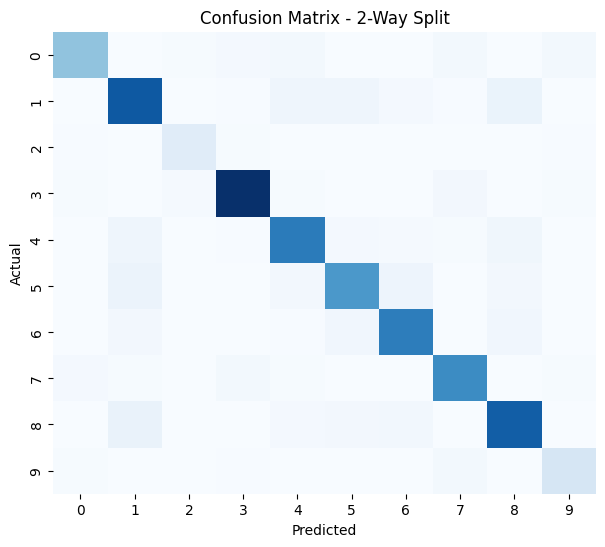

In [3]:
# --- Imports ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load dataset ---
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/yield_df.csv")

# --- Drop unnecessary columns ---
df = df.drop(['Unnamed: 0', 'Area'], axis=1)

# --- Define features and target ---
X = df[['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
        'pesticides_tonnes', 'avg_temp']]
y = df['Item']

# --- Encode target ---
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_

# --- Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-Test Split (80–20) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# --- Define XGBoost Model ---
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=12,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

# --- Train ---
xgb.fit(X_train, y_train)

# --- Predict ---
y_pred = xgb.predict(X_test)

# --- Evaluate ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("✅ Test Results (2-Way Split 80–20)")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, cmap='Blues', cbar=False)
plt.title("Confusion Matrix - 2-Way Split")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
